#  Satellite Image Classification for Geographic Information Systems (GIS)

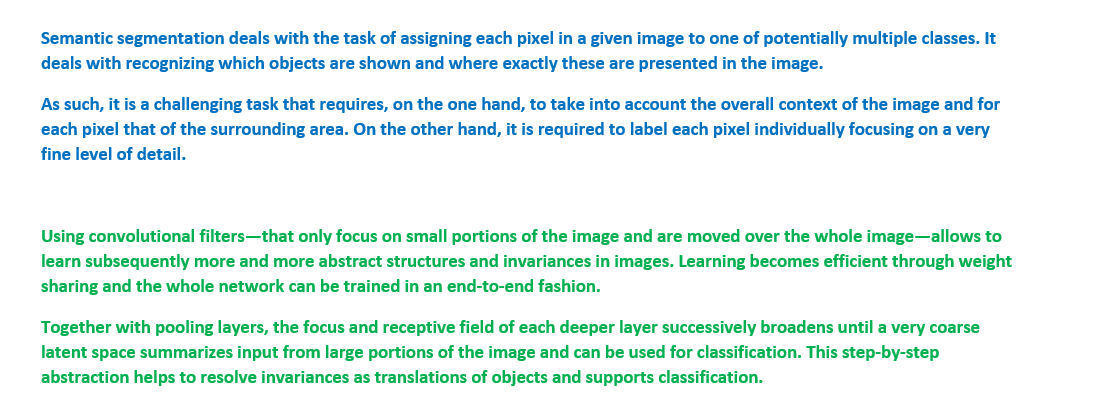

![ChessUrl](https://storage.googleapis.com/gweb-uniblog-publish-prod/original_images/Draping.gif "chess")






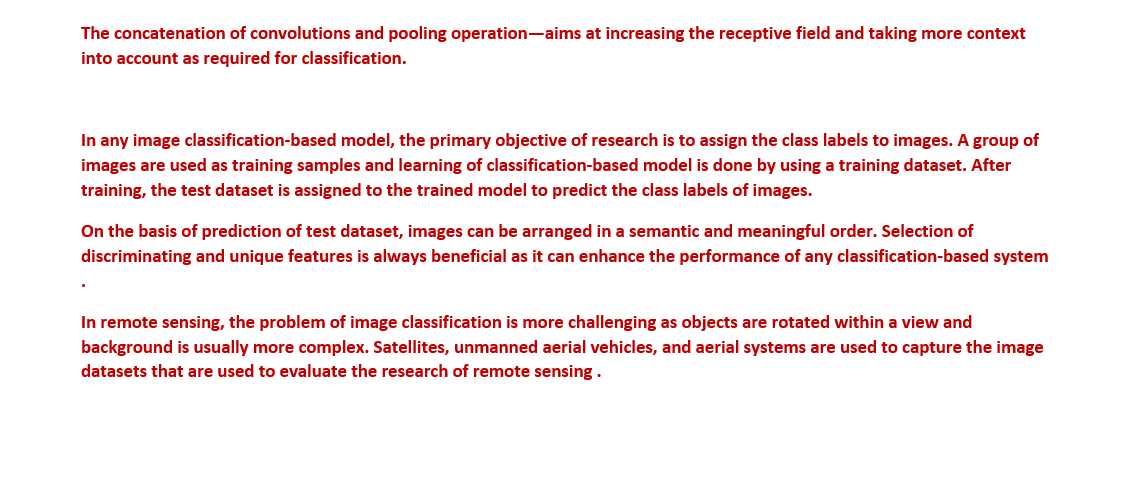

### Import all the required packages

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16
from keras import models, layers, optimizers
import matplotlib.image as mpimg
import math

import os

## Data Preprocessing

### Keras ImageDataGenerator 



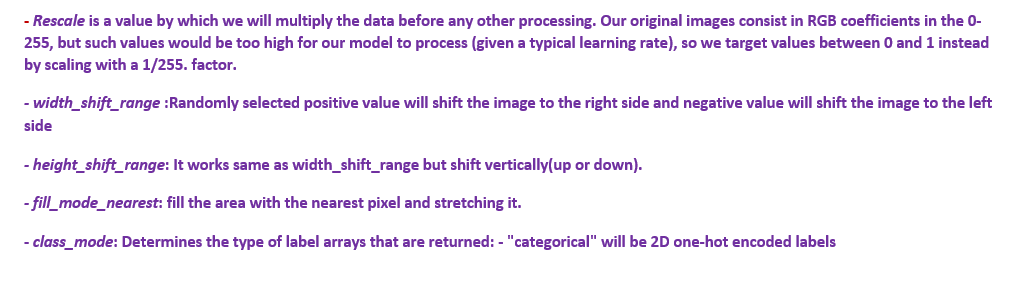

In [41]:
train_DIR = "/kaggle/input/intel-image-classification/seg_train/seg_train/"

train_datagen = ImageDataGenerator( rescale = 1.0/255,
                                          width_shift_range=0.2,
                                          height_shift_range=0.2,
                                          zoom_range=0.2,
                                          vertical_flip=True,
                                          fill_mode='nearest')


train_generator = train_datagen.flow_from_directory(train_DIR,
                                                    batch_size=32,
                                                    class_mode='categorical',
                                                    target_size=(150, 150))

test_DIR = "/kaggle/input/intel-image-classification/seg_test/seg_test/"
validation_datagen = ImageDataGenerator(rescale = 1.0/255)

validation_generator = validation_datagen.flow_from_directory(test_DIR,
                                                    batch_size=128,
                                                    class_mode='categorical',
                                                    target_size=(150, 150))

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [42]:
print("type of Images in Train dataset"+str(os.listdir(train_DIR)))
print("type of Images in Test dataset"+str(os.listdir(test_DIR)))

type of Images in Train dataset['mountain', 'street', 'buildings', 'sea', 'forest', 'glacier']
type of Images in Test dataset['mountain', 'street', 'buildings', 'sea', 'forest', 'glacier']


**Almost same number of samples for each class, hence no class-imbalance problem.**


## Data Visualization

mountain images:


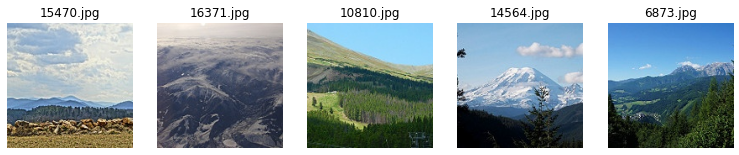

street images:


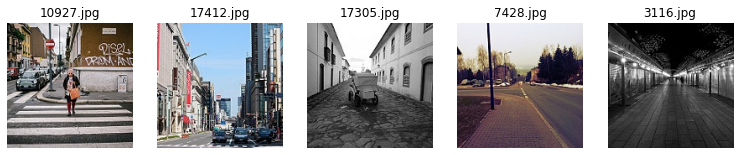

buildings images:


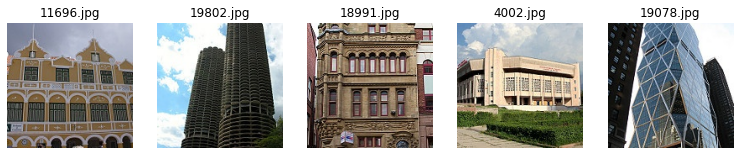

sea images:


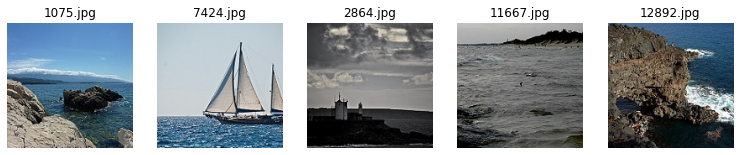

forest images:


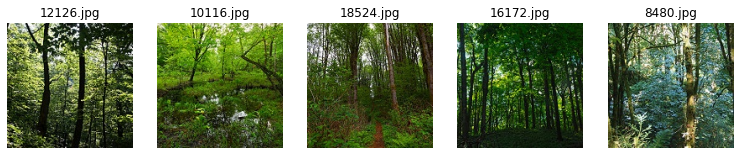

glacier images:


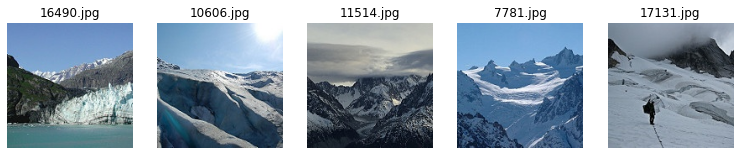

In [43]:
import cv2 as cv
rows, cols = (1, 5)
import matplotlib.pyplot as plt
for categories in os.listdir(train_DIR):
    print(f'{categories} images:')
    path = f'{train_DIR}/{categories}'    
    fig = plt.figure(figsize = (13, 8))
    for i in range(rows * cols):
        fig.add_subplot(rows, cols, i+1)
        image_id = os.listdir(path)[np.random.randint(0, 2000)]
        image = cv.imread(path + f'/{image_id}')
        plt.imshow(image[:, :, ::-1])
        plt.title(image_id)
        plt.axis('off')
    plt.show()

## Data Augmentation

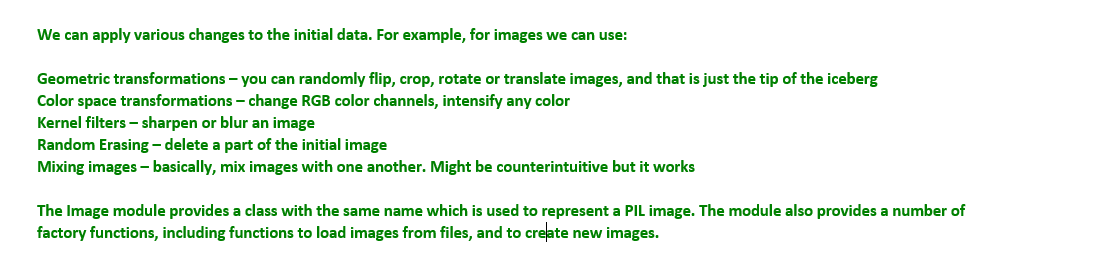

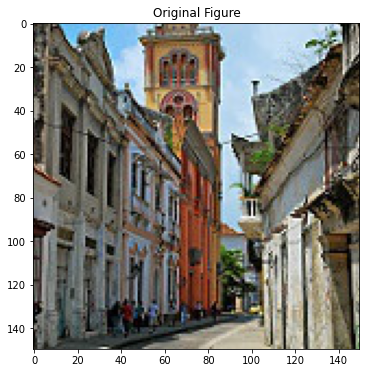

In [66]:
from PIL import Image
img = Image.open('../input/intel-image-classification/seg_train/seg_train/street/10019.jpg')
fig,ax = plt.subplots(figsize=(6,6))
ax.imshow(img)
ax.set_title('Original Figure')
plt.show()


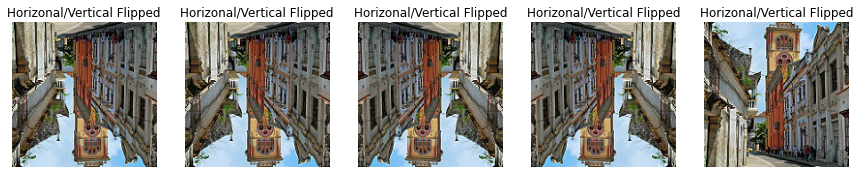

In [70]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
                horizontal_flip=True,
                vertical_flip=True,
                fill_mode = 'nearest')
aug_iter = datagen.flow(np.expand_dims(img,axis=0), batch_size=1)
fig, ax = plt.subplots(nrows=1,ncols=5,figsize=(15,15))
# generate batch of images
for i in range(5):
    image = next(aug_iter)[0].astype('uint8')
    ax[i].imshow(image)
    ax[i].axis('off')
    ax[i].set_title('Horizonal/Vertical Flipped')

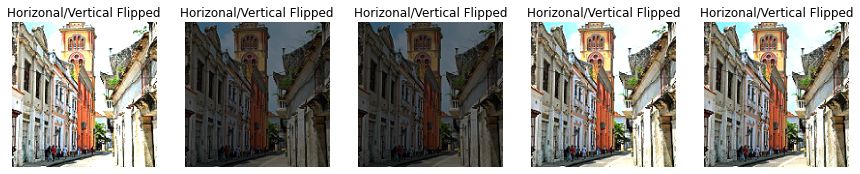

In [69]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
            brightness_range=[0.2,1.9],
            fill_mode = 'nearest')
aug_iter = datagen.flow(np.expand_dims(img,axis=0), batch_size=1)
fig, ax = plt.subplots(nrows=1,ncols=5,figsize=(15,15))
# generate batch of images
for i in range(5):
    image = next(aug_iter)[0].astype('uint8')
    ax[i].imshow(image)
    ax[i].axis('off')
    ax[i].set_title('Horizonal/Vertical Flipped')

## Simple CNN Model (sCNN)
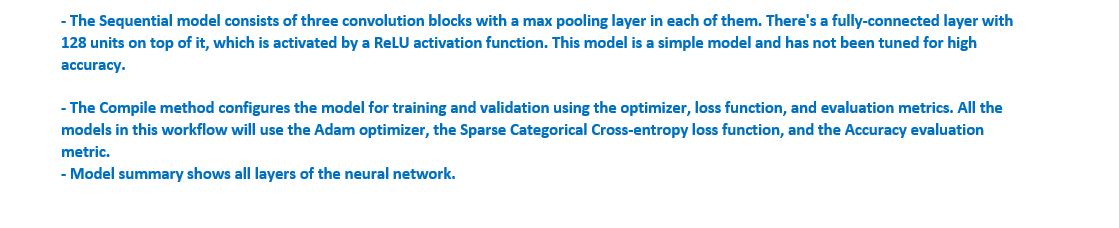

In [58]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_198 (Conv2D)          (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_199 (Conv2D)          (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 41472)             0         
_________________________________________________________________
dense_20 (Dense)             (None, 128)               5308544   
_________________________________________________________________
dense_21 (Dense)             (None, 6)                

In [59]:
model.compile(loss = 'categorical_crossentropy', optimizer= tf.keras.optimizers.Adam(), metrics=['acc'])
history = model.fit(train_generator,
                    epochs = 10,
                    verbose = 1,
                   validation_data = validation_generator,
                   callbacks=[learning_rate_reduction])

Epoch 1/10
439/439 [==============================] - 90s 204ms/step - loss: 1.2270 - acc: 0.5048 - val_loss: 0.9689 - val_acc: 0.6287
Epoch 2/10
439/439 [==============================] - 90s 205ms/step - loss: 0.9668 - acc: 0.6199 - val_loss: 0.8448 - val_acc: 0.6657
Epoch 3/10
439/439 [==============================] - 89s 203ms/step - loss: 0.8767 - acc: 0.6642 - val_loss: 0.7896 - val_acc: 0.7080
Epoch 4/10
439/439 [==============================] - 89s 202ms/step - loss: 0.8234 - acc: 0.6872 - val_loss: 0.7619 - val_acc: 0.7213
Epoch 5/10
439/439 [==============================] - 89s 203ms/step - loss: 0.7597 - acc: 0.7162 - val_loss: 0.6610 - val_acc: 0.7613
Epoch 6/10
439/439 [==============================] - 90s 206ms/step - loss: 0.7226 - acc: 0.7336 - val_loss: 0.6224 - val_acc: 0.7783
Epoch 7/10
439/439 [==============================] - 90s 205ms/step - loss: 0.6645 - acc: 0.7555 - val_loss: 0.5996 - val_acc: 0.7787
Epoch 8/10
439/439 [==============================] - 8

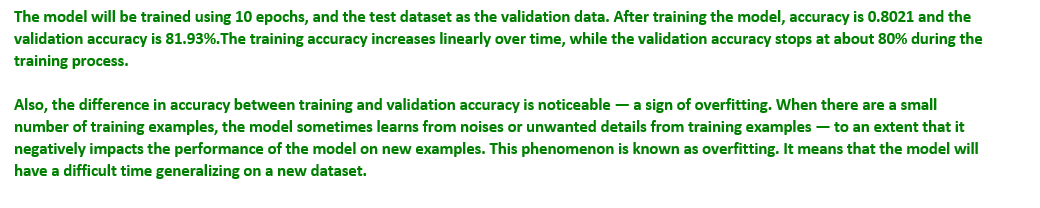

## Transfer Learning

**Deep networks faced many complications including the optimization of networks, degradation, and most importantly vanishing gradients. According to literature, fine-tuning of a pretrained CNN network can increase the classification accuracy in the respective domain . 
InceptionV3 is trained on ImageNet, which consists of almost 1.2 million images whose features and weights are transferred to the next task using the same pretrained network. Fine-tuning works and processes a new task with different numbers of classes and categories.**

**The number of epochs referred to as iterations used to train a fine-tuned network is less compared to training the model from scratch. The motivation behind the usage of pretrained networks is to intensify the accuracy by using the concept of “transfer learning.**

**” Transfer learning refers to machine learning technique, which allows the transfer of information learnt from one domain to similar problems in related domain. It is recommended to use the model developed and trained for a task as a starting point of the task that is similar to the trained one . Researchers have used diverse notations to describe different concepts of transfer learning to define it. Domain and task are the two basic concepts of transfer learning, which are explained mathematically. Transfer learning is defined arithmetically to make the picture clearer**

![ChessUrl](https://www.altoros.com/blog/wp-content/uploads/2017/04/building-keras-based-image-classifier-using-tensorflow-for-back-end.gif "chess")

## InceptionV3

In [46]:
from keras.applications.inception_v3 import InceptionV3

inceptionV3 = InceptionV3(include_top= False, input_shape=(150,150,3))

for layer in inceptionV3.layers:
	layer.trainable = False

In [47]:
last_layer = inceptionV3.get_layer('mixed9')

print('last layer output shape: ', last_layer.output_shape)

last_output = last_layer.output

last layer output shape:  (None, 3, 3, 2048)


In [48]:
import tensorflow as tf
from keras.callbacks import ReduceLROnPlateau
x = tf.keras.layers.Flatten()(last_output)
x = tf.keras.layers.Dense(units = 1024, activation = tf.nn.relu)(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense  (6, activation = tf.nn.softmax)(x)

model = tf.keras.Model( inceptionV3.input, x)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                                            patience=1,
                                            verbose=1,
                                            factor=0.25,
                                            min_lr=0.000003)


In [49]:
model.compile(loss = 'categorical_crossentropy', optimizer= tf.keras.optimizers.Adam(), metrics=['acc'])

In [50]:
model.summary()

Model: "functional_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d_104 (Conv2D)             (None, 74, 74, 32)   864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, 74, 74, 32)   96          conv2d_104[0][0]                 
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 74, 74, 32)   0           batch_normalization_94[0][0]     
_______________________________________________________________________________________

In [51]:
history = model.fit(train_generator,
                    epochs = 10,
                    verbose = 1,
                   validation_data = validation_generator,
                   callbacks=[learning_rate_reduction])

Epoch 1/10
439/439 [==============================] - 95s 216ms/step - loss: 0.5223 - acc: 0.8200 - val_loss: 0.3019 - val_acc: 0.8940
Epoch 2/10
439/439 [==============================] - 94s 214ms/step - loss: 0.3871 - acc: 0.8580 - val_loss: 0.2746 - val_acc: 0.9010
Epoch 3/10
439/439 [==============================] - 94s 214ms/step - loss: 0.3664 - acc: 0.8661 - val_loss: 0.2551 - val_acc: 0.9047
Epoch 4/10
439/439 [==============================] - ETA: 0s - loss: 0.3461 - acc: 0.8716
Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
439/439 [==============================] - 93s 211ms/step - loss: 0.3461 - acc: 0.8716 - val_loss: 0.2657 - val_acc: 0.9010
Epoch 5/10
439/439 [==============================] - 93s 212ms/step - loss: 0.2843 - acc: 0.8972 - val_loss: 0.2448 - val_acc: 0.9090
Epoch 6/10
439/439 [==============================] - 93s 211ms/step - loss: 0.2738 - acc: 0.9009 - val_loss: 0.2353 - val_acc: 0.9137
Epoch 7/10
439/439 [==========

In [52]:
result = history.history
print(max(result['acc']))

0.9137808084487915



![alt](https://lh5.googleusercontent.com/BQlJS4FWnBJnj6p8eZjXOCE4fewvUsx1NmFXmaI5fFqvUjNiitnVuFuaELc4XYXtuYbWH7gV5x_0Lmrxq6RB6Ugftu91O8ltqcIgHJDsGoCk5yhXMaoPJuqb6PwXeucPFWNRTpjWcw)

## Complex CNN Model based on Pre-trained VGG16 Model 

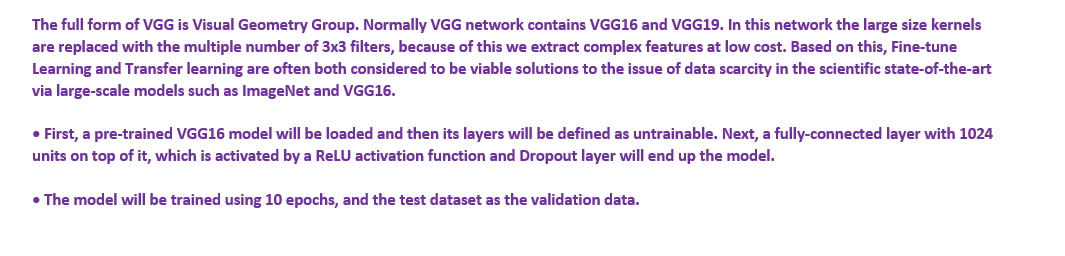

In [53]:
conv_base = VGG16(
                    weights = 'imagenet',
                    include_top = False,
                    input_shape = (150,150,3)
                 )

In [54]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

Let's define the model with it's own classifeir on top of VGG16 convolutional base.

In [55]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(250, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(6, activation='softmax'))

In [56]:
model.compile(loss='categorical_crossentropy', optimizer=optimizers.Nadam(lr=2e-5), metrics=['acc'])

In [57]:
history = model.fit(train_generator,
                    epochs = 10,
                    verbose = 1,
                   validation_data = validation_generator,
                   callbacks=[learning_rate_reduction])

Epoch 1/10
439/439 [==============================] - 109s 248ms/step - loss: 0.7219 - acc: 0.7222 - val_loss: 0.3827 - val_acc: 0.8570
Epoch 2/10
439/439 [==============================] - 108s 246ms/step - loss: 0.4074 - acc: 0.8539 - val_loss: 0.2633 - val_acc: 0.9023
Epoch 3/10
439/439 [==============================] - ETA: 0s - loss: 0.3261 - acc: 0.8876
Epoch 00003: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-06.
439/439 [==============================] - 108s 245ms/step - loss: 0.3261 - acc: 0.8876 - val_loss: 0.2930 - val_acc: 0.8940
Epoch 4/10
439/439 [==============================] - 108s 247ms/step - loss: 0.2580 - acc: 0.9121 - val_loss: 0.2399 - val_acc: 0.9113
Epoch 5/10
439/439 [==============================] - 108s 247ms/step - loss: 0.2371 - acc: 0.9166 - val_loss: 0.2276 - val_acc: 0.9173
Epoch 6/10
439/439 [==============================] - ETA: 0s - loss: 0.2301 - acc: 0.9220
Epoch 00006: ReduceLROnPlateau reducing learning rate to 3e-06.
439/4

# This approach achieves an accuracy of 93.2%

**The results are evidence that transfer learning of useful domain knowledge is possible from the classification of simulated environments to the classification of real-world photographic data, further improving classification ability of real data.
It also promotes it as a viable solution in order to both reduce computational resource requirements and lead to higher classification ability overall.**

## Conclusion and Next Steps

**One way to increase performance even further is to train (or "fine-tune") the weights of the top layers of the pre-trained model alongside the training of the added classifier. The training process will force the weights to be tuned from generic feature maps to features associated specifically with the dataset.** 

**In most convolutional networks, the higher up a layer is, the more specialized it is. The first few layers learn very simple and generic features that generalize to almost all types of images. As you go higher up, the features are increasingly more specific to the dataset on which the model was trained. The goal of fine-tuning is to adapt these specialized features to work
with the new dataset, rather than overwrite the generic learning.**

